Getting all the imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

This is to import the csv

In [3]:
movie_csv = "movies.csv"
movie_df = pd.read_csv(movie_csv, encoding = "ISO-8859-1")
movie_df['Year'] = movie_df['Year'].astype(int)
movie_df.head(5)

,Const,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,...,Rotten_Tomatoes_Rating,Metacritic_Rating,Rated,Home_Release,Production,Country,Awards_Blurb,Languages,Month Released,Awards
0,tt0035423,Kate & Leopold,https://www.imdb.com/title/tt0035423/,movie,6.4,118.0,2001,"['Comedy', ' Fantasy', ' Romance']",77905.0,2001-12-11,...,50.0,44.0,PG-13,2002-Jun-11,Miramax Films,USA,Nominated for 1 Oscar. Another 1 win & 4 nomin...,"['English', ' French']",12.0,"{'Oscar.': 1, 'win': 1, 'nominations.': 5}"
1,tt0065643,The Dirty Mind of Young Sally,https://www.imdb.com/title/tt0065643/,movie,5.2,95.0,1973,['Comedy'],226.0,1973-04-20,...,NaN,NaN,X,0,NaN,USA,NaN,['English'],4.0,{}
2,tt0067716,Schlock,https://www.imdb.com/title/tt0067716/,movie,5.7,80.0,1973,"['Comedy', ' Horror', ' Sci-Fi']",1221.0,1973-04-11,...,71.0,NaN,PG,2001-Oct-02,Jack H. Harris Enterprises,USA,1 win & 1 nomination.,['English'],4.0,"{'win': 1, 'nomination.': 1}"
3,tt0068156,1776,https://www.imdb.com/title/tt0068156/,movie,7.6,141.0,1972,"['Drama', ' Family', ' History', ' Musical']",7588.0,1972-11-09,...,69.0,NaN,G,2002-Jul-02,Sony Pictures Home Entertainment,USA,Nominated for 1 Oscar. Another 1 win & 1 nomin...,['English'],11.0,Could not parse awards
4,tt0068168,Across 110th Street,https://www.imdb.com/title/tt0068168/,movie,7.0,102.0,1972,"['Action', ' Crime', ' Drama', ' Thriller']",4923.0,1972-12-19,...,81.0,NaN,R,2001-Oct-16,MGM,USA,NaN,"['English', ' Italian']",12.0,{}


This is to split up the DataFrame by a few genres;

horror_df has all horror movies

romance_df has all romance movies

sciFi_df has all sci-fi

In [4]:
movie_df['is_horror'] = ''
movie_df['is_romance'] = ''
movie_df['is_sci-fi'] = ''

for value, row in movie_df.iterrows():
    movie_df.loc[value, 'is_horror'] = 'Horror' in row['Genres']
    movie_df.loc[value, 'is_romance'] = 'Romance' in row['Genres']
    movie_df.loc[value, 'is_sci-fi'] = 'Sci-Fi' in row['Genres']
horror_df = movie_df[movie_df['is_horror']==True]
romance_df = movie_df[movie_df['is_romance']==True]
sciFi_df = movie_df[movie_df['is_sci-fi']==True]
sciFi_df.head()

,Const,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,...,Home_Release,Production,Country,Awards_Blurb,Languages,Month Released,Awards,is_horror,is_romance,is_sci-fi
2,tt0067716,Schlock,https://www.imdb.com/title/tt0067716/,movie,5.7,80.0,1973,"['Comedy', ' Horror', ' Sci-Fi']",1221.0,1973-04-11,...,2001-Oct-02,Jack H. Harris Enterprises,USA,1 win & 1 nomination.,['English'],4.0,"{'win': 1, 'nomination.': 1}",True,False,True
12,tt0068595,Flesh Gordon,https://www.imdb.com/title/tt0068595/,movie,4.7,78.0,1974,"['Comedy', ' Sci-Fi']",3839.0,1974-07-30,...,2004-Jan-27,NaN,USA,1 nomination.,['English'],7.0,{'nomination.': 1},False,False,True
37,tt0069768,Battle for the Planet of the Apes,https://www.imdb.com/title/tt0069768/,movie,5.5,93.0,1973,"['Action', ' Sci-Fi']",28321.0,1973-06-15,...,2009-May-05,20th Century Fox,USA,2 nominations.,['English'],6.0,{'nominations.': 2},False,False,True
48,tt0069895,The Crazies,https://www.imdb.com/title/tt0069895/,movie,6.1,103.0,1973,"['Action', ' Horror', ' Sci-Fi']",11011.0,1973-03-16,...,2003-Apr-29,Blue Underground,USA,NaN,['English'],3.0,{},True,False,True
51,tt0069945,Dark Star,https://www.imdb.com/title/tt0069945/,movie,6.3,83.0,1974,"['Comedy', ' Sci-Fi']",21782.0,1974-04-30,...,1999-Mar-16,Jack H. Harris Enterprises Inc,USA,1 win & 2 nominations.,['English'],4.0,"{'win': 1, 'nominations.': 2}",False,False,True


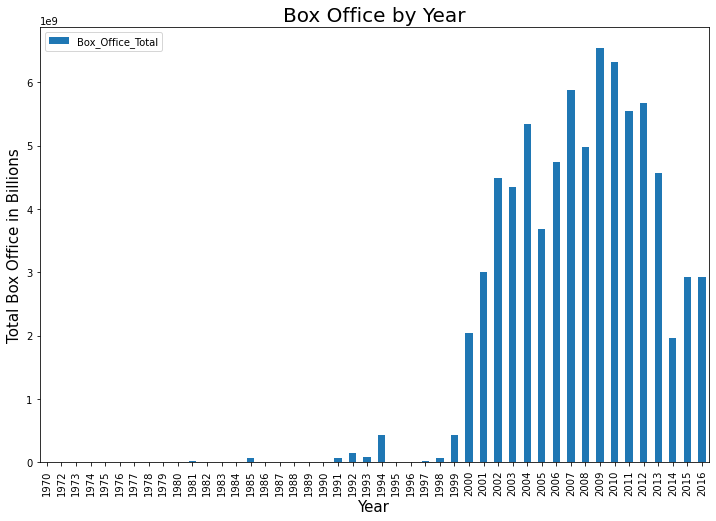

In [5]:
yearly_movies = movie_df.groupby('Year').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count'
}).reset_index()
yearly_movies.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies'
},inplace = True, axis = 1)



bar_lineH=yearly_movies.plot.bar(x ='Year',y ='Box_Office_Total', figsize = (12,8))
plt.title('Box Office by Year', fontsize = 20)
plt.ylabel('Total Box Office in Billions', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.savefig('Figures/Box_Office_by_year.png')


These dfs will be useful in finding if box office or IMDb rating is influenced by the month of release.  The box_office will be a sum, the tating will be a mean and the title will be a count:

In [6]:
monthly_horror = horror_df.groupby('Month Released').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count'
})
monthly_horror.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies'
},inplace = True, axis = 1)
monthly_romance = romance_df.groupby('Month Released').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count'
})
monthly_romance.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies'
},inplace = True, axis = 1)
monthly_sciFi = sciFi_df.groupby('Month Released').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count'
})
monthly_sciFi.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies'
},inplace = True, axis = 1)

monthly_horror = monthly_horror.reset_index()
monthly_romance = monthly_romance.reset_index()
monthly_sciFi = monthly_sciFi.reset_index()
monthly_sciFi.head()

,Month Released,Box_Office_Total,Average_Rating,Total_Movies
0,1.0,6.572719e+08,6.228261,46
1,2.0,2.603775e+08,6.100000,16
2,3.0,2.123479e+09,5.900000,52
3,4.0,2.816202e+09,5.822917,48
4,5.0,1.659052e+09,5.835417,48


These DataFrames will track the success of certain genres depending on year of release.  The box_office will be a sum, the tating will be a mean and the title will be a count:

In [7]:
yearly_horror = horror_df.groupby('Year').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count'
})
yearly_horror.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies'
},inplace = True, axis = 1)

yearly_romance = romance_df.groupby('Year').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count'
})
yearly_romance.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies'
},inplace = True, axis = 1)

yearly_sciFi = sciFi_df.groupby('Year').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count'
})
yearly_sciFi.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies'
},inplace = True, axis = 1)

yearly_horror = yearly_horror.reset_index()
yearly_romance = yearly_romance.reset_index()
yearly_sciFi = yearly_sciFi.reset_index()
yearly_sciFi.head()

,Year,Box_Office_Total,Average_Rating,Total_Movies
0,1973,0.0,6.136364,11
1,1974,0.0,5.114286,7
2,1975,0.0,6.225000,8
3,1976,0.0,5.042857,7
4,1977,0.0,5.736364,11


### **As a quick reference the parent Dataframes are as follows:**

##### The master dataframe is called: 

 - **movies_df**
 
### The truncated genre dataframes are called:

 - **monthly_horror**
 - **monthly_romance**
 - **monthly_sciFi**
 
### **The ones made for your use are as follows:**

##### The monthly DataFrames are called:

 - **monthly_horror**
 - **monthly_romance**
 - **monthly_sciFi**
 
##### The yearly DataFrames are called:
 
 - **yearly_horror** 
 - **yearly_romance**
 - **yearly_sciFi**
  
  *Let me know if you need these in a differnt form or if I should merge like-DataFrames together. If I merge them the column named would need to be long *ie: "horror_Box_Office"* 
  *I thought it would be easier to type this way, but if you prefer the organization of merged dataframes, just let me know and I'll get right on it.
 

In [37]:
monthly_sciFi.head(12)

,Month Released,Box_Office_Total,Average_Rating,Total_Movies
0,Jan,6.572719e+08,6.228261,46
1,Feb,2.603775e+08,6.100000,16
2,Mar,2.123479e+09,5.900000,52
3,Apr,2.816202e+09,5.822917,48
4,May,1.659052e+09,5.835417,48
5,Jun,3.865026e+09,6.178378,74
6,Jul,2.028859e+09,5.943333,60
7,Aug,8.447543e+08,5.568966,58
8,Sep,5.425086e+08,6.317647,34
9,Oct,9.416907e+08,6.010000,40


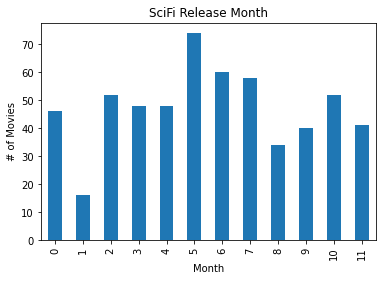

In [9]:
monthly_scifi_rel= monthly_sciFi["Total_Movies"]
y_axis = monthly_scifi_rel.values
x_axis = monthly_scifi_rel.index

plt.title('SciFi Release Month')
plt.xlabel('Month')
plt.ylabel('# of Movies')

monthly_scifi_rel.plot(kind="bar")



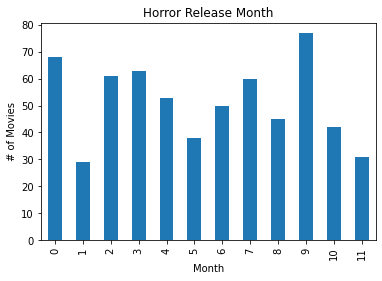

In [10]:
monthly_horror_rel= monthly_horror["Total_Movies"]
y_axis = monthly_horror_rel.values
x_axis = monthly_horror_rel.index

plt.title('Horror Release Month')
plt.xlabel('Month')
plt.ylabel('# of Movies')


monthly_horror_rel.plot(kind="bar")


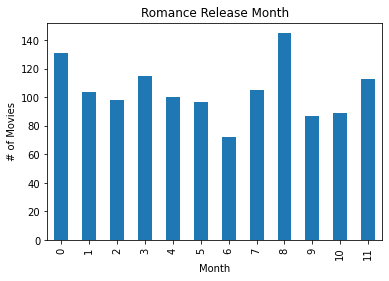

In [11]:
monthly_romance_rel= monthly_romance["Total_Movies"]
y_axis = monthly_romance_rel.values
x_axis = monthly_romance_rel.index

plt.title('Romance Release Month')
plt.xlabel('Month')
plt.ylabel('# of Movies')

monthly_romance_rel.plot(kind="bar")


In [12]:
yearly_sciFi.head()

,Year,Box_Office_Total,Average_Rating,Total_Movies
0,1973,0.0,6.136364,11
1,1974,0.0,5.114286,7
2,1975,0.0,6.225000,8
3,1976,0.0,5.042857,7
4,1977,0.0,5.736364,11


Text(0.5, 1.0, 'Movies rated over the years')

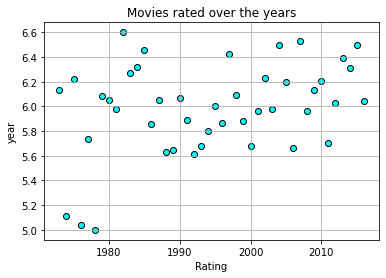

In [13]:
x_values = yearly_sciFi["Year"]
y_values = yearly_sciFi["Average_Rating"]
plt.scatter(x_values, y_values, edgecolors="black", facecolor ="cyan")
plt.xlabel("Rating")
plt.ylabel("year")
plt.grid()
plt.title("Movies rated over the years")

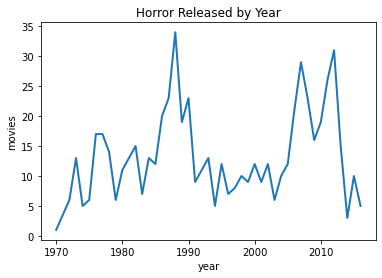

In [14]:
x_axis = yearly_horror["Year"]
horror_title_rel = yearly_horror["Total_Movies"]
plt.title("Horror Released by Year")
plt.plot(x_axis,horror_title_rel,linewidth=2, markersize=10)
plt.ylabel("movies")
plt.xlabel("year")

plt.show()


In [15]:
x_axis = yearly_romance["Year"]
romance_title_rel = yearly_horror["Total_Movies"]
plt.title("Romance Released by Year")
plt.plot(x_axis,romance_title_rel,linewidth=2, markersize=10)
plt.ylabel("movies")
plt.xlabel("year")

plt.show()

ValueError: x and y must have same first dimension, but have shapes (45,) and (46,)

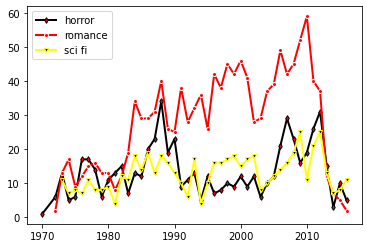

In [16]:
plt.plot('Year','Total_Movies', data=yearly_horror, marker ='d', markerfacecolor ='red', markersize=4, color ='black', linewidth=2, label='horror')
plt.plot('Year','Total_Movies', data=yearly_romance, marker = 'o', markeredgecolor='white', markersize =4, color = 'red', linewidth=2, label='romance')
plt.plot('Year','Total_Movies', data=yearly_sciFi, marker ='v', markerfacecolor ='black', markersize =4, color ='yellow', linewidth=2, label='sci fi')
plt.legend()

In [17]:
monthly_sciFi.dtypes


Month Released      float64
Box_Office_Total    float64
Average_Rating      float64
Total_Movies          int64
dtype: object

In [18]:
monthly_sciFi['Month Released'] = monthly_sciFi["Month Released"].astype(str)
monthly_horror['Month Released'] = monthly_horror["Month Released"].astype(str)
monthly_romance['Month Released'] = monthly_romance["Month Released"].astype(str)

In [19]:
monthly_romance.dtypes

Month Released       object
Box_Office_Total    float64
Average_Rating      float64
Total_Movies          int64
dtype: object

In [20]:
monthly_sciFi['Month Released'].replace({'1.0':'Jan', '2.0':'Feb','3.0':'Mar','4.0':'Apr','5.0':'May','6.0':'Jun','7.0':'Jul','8.0':'Aug','9.0':'Sep','10.0':'Oct','11.0':'Nov','12.0':'Dec'}, inplace=True)
monthly_horror['Month Released'].replace({'1.0':'Jan', '2.0':'Feb','3.0':'Mar','4.0':'Apr','5.0':'May','6.0':'Jun','7.0':'Jul','8.0':'Aug','9.0':'Sep','10.0':'Oct','11.0':'Nov','12.0':'Dec'}, inplace=True)
monthly_romance['Month Released'].replace({'1.0':'Jan', '2.0':'Feb','3.0':'Mar','4.0':'Apr','5.0':'May','6.0':'Jun','7.0':'Jul','8.0':'Aug','9.0':'Sep','10.0':'Oct','11.0':'Nov','12.0':'Dec'}, inplace=True)



In [21]:
monthly_sciFi.set_index('Month Released')

,Box_Office_Total,Average_Rating,Total_Movies
Month Released,,,
Jan,6.572719e+08,6.228261,46
Feb,2.603775e+08,6.100000,16
Mar,2.123479e+09,5.900000,52
Apr,2.816202e+09,5.822917,48
May,1.659052e+09,5.835417,48
Jun,3.865026e+09,6.178378,74
Jul,2.028859e+09,5.943333,60
Aug,8.447543e+08,5.568966,58
Sep,5.425086e+08,6.317647,34


In [22]:
monthly_horror.set_index('Month Released')

,Box_Office_Total,Average_Rating,Total_Movies
Month Released,,,
Jan,445797958.0,5.892647,68
Feb,239461885.0,5.268966,29
Mar,389588250.0,5.501639,61
Apr,366470868.0,5.361905,63
May,87923407.0,5.611321,53
Jun,348657975.0,5.597368,38
Jul,193052530.0,5.440000,50
Aug,356217701.0,5.525000,60
Sep,114538729.0,5.628889,45


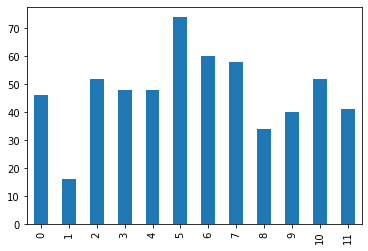

In [23]:
monthly_sciFi.set_index('Month Released')
monthly_scifi_rel= monthly_sciFi["Total_Movies"]
y_axis = monthly_scifi_rel.values
x_axis = monthly_scifi_rel.index

monthly_scifi_rel.plot(kind="bar")


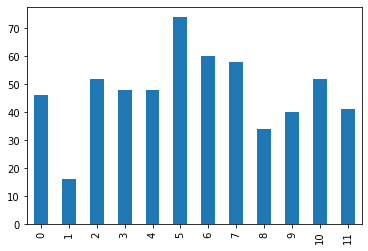

In [24]:

monthly_scifi_rel= monthly_sciFi["Total_Movies"]
y_axis = monthly_scifi_rel.values
x_axis = monthly_scifi_rel.index

monthly_scifi_rel.plot(kind="bar")

In [25]:
monthly_horror.set_index('Month Released')

,Box_Office_Total,Average_Rating,Total_Movies
Month Released,,,
Jan,445797958.0,5.892647,68
Feb,239461885.0,5.268966,29
Mar,389588250.0,5.501639,61
Apr,366470868.0,5.361905,63
May,87923407.0,5.611321,53
Jun,348657975.0,5.597368,38
Jul,193052530.0,5.440000,50
Aug,356217701.0,5.525000,60
Sep,114538729.0,5.628889,45


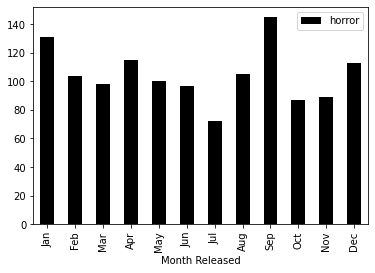

In [26]:
bar_line=monthly_romance.plot.bar(x ='Month Released',y ='Total_Movies', facecolor = 'Black', label='horror')




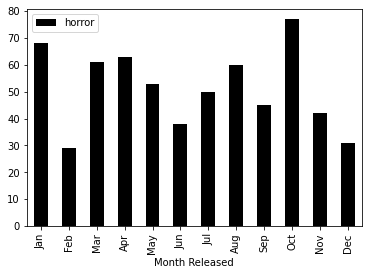

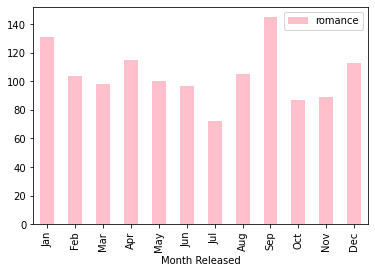

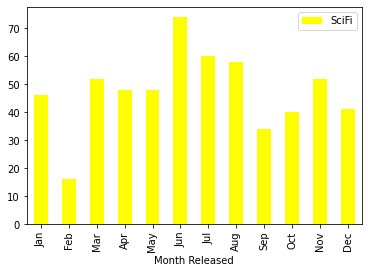

In [27]:
bar_lineH=monthly_horror.plot.bar(x ='Month Released',y ='Total_Movies', facecolor = 'Black', label="horror")
bar_lineR=monthly_romance.plot.bar(x ='Month Released',y ='Total_Movies', facecolor = 'pink', label = "romance")
bar_lineS=monthly_sciFi.plot.bar(x ='Month Released',y ='Total_Movies', facecolor = 'yellow', label = "SciFi")
bar_three=(bar_lineH, bar_lineR, bar_lineS)


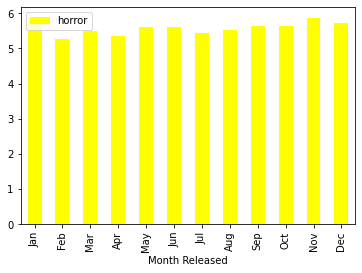

In [28]:
bar_lineS=monthly_horror.plot.bar(x ='Month Released',y ='Average_Rating', facecolor = 'yellow', label = "horror")

In [29]:
x_axis = yearly_romance["Year"]
romance_title_rel = yearly_horror["Average_Rating"]
plt.title("Romance Rating by Year")
plt.plot(x_axis,romance_title_rel,linewidth=2, markersize=10)
plt.ylabel("rating")
plt.xlabel("year")

plt.show()

ValueError: x and y must have same first dimension, but have shapes (45,) and (46,)

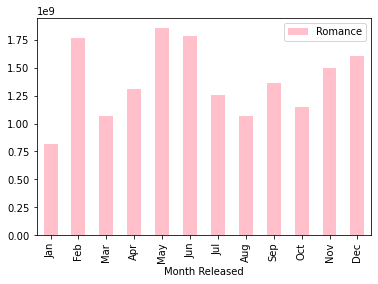

In [30]:
bar_lineH=monthly_romance.plot.bar(x ='Month Released',y ='Box_Office_Total', facecolor = 'pink', label="Romance")

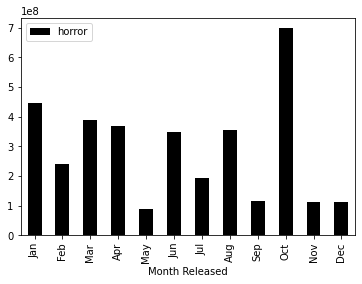

In [31]:
bar_lineH=monthly_horror.plot.bar(x ='Month Released',y ='Box_Office_Total', facecolor = 'Black', label="horror")

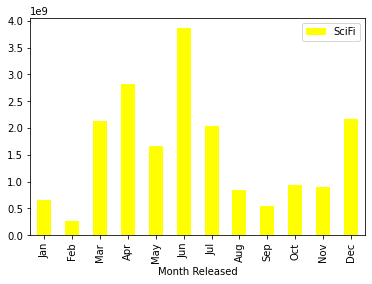

In [32]:
bar_lineH=monthly_sciFi.plot.bar(x ='Month Released',y ='Box_Office_Total', facecolor = 'yellow', label="SciFi")

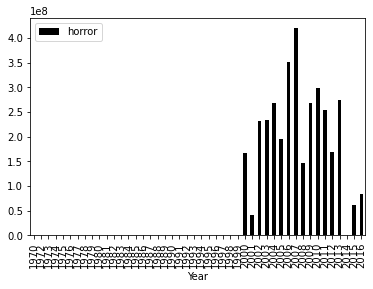

In [33]:
bar_lineH=yearly_horror.plot.bar(x ='Year',y ='Box_Office_Total', facecolor = 'Black', label="horror")

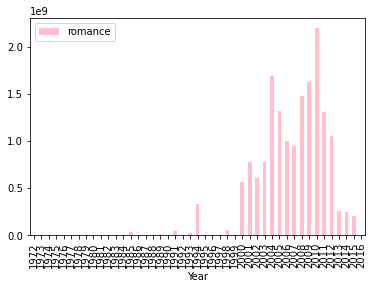

In [34]:
bar_lineH=yearly_romance.plot.bar(x ='Year',y ='Box_Office_Total', facecolor = 'pink', label="romance")

In [35]:
movie_df['Number_of_Genres'] = ""
for index, row in movie_df.iterrows():
    x = 0
    for i in row['Genres']:
        x += 1
    movie_df.loc[index, 'Number_of_Genres'] = x
movie_df.head()

,Const,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,...,Production,Country,Awards_Blurb,Languages,Month Released,Awards,is_horror,is_romance,is_sci-fi,Number_of_Genres
0,tt0035423,Kate & Leopold,https://www.imdb.com/title/tt0035423/,movie,6.4,118.0,2001,"['Comedy', ' Fantasy', ' Romance']",77905.0,2001-12-11,...,Miramax Films,USA,Nominated for 1 Oscar. Another 1 win & 4 nomin...,"['English', ' French']",12.0,"{'Oscar.': 1, 'win': 1, 'nominations.': 5}",False,True,False,34
1,tt0065643,The Dirty Mind of Young Sally,https://www.imdb.com/title/tt0065643/,movie,5.2,95.0,1973,['Comedy'],226.0,1973-04-20,...,NaN,USA,NaN,['English'],4.0,{},False,False,False,10
2,tt0067716,Schlock,https://www.imdb.com/title/tt0067716/,movie,5.7,80.0,1973,"['Comedy', ' Horror', ' Sci-Fi']",1221.0,1973-04-11,...,Jack H. Harris Enterprises,USA,1 win & 1 nomination.,['English'],4.0,"{'win': 1, 'nomination.': 1}",True,False,True,32
3,tt0068156,1776,https://www.imdb.com/title/tt0068156/,movie,7.6,141.0,1972,"['Drama', ' Family', ' History', ' Musical']",7588.0,1972-11-09,...,Sony Pictures Home Entertainment,USA,Nominated for 1 Oscar. Another 1 win & 1 nomin...,['English'],11.0,Could not parse awards,False,False,False,44
4,tt0068168,Across 110th Street,https://www.imdb.com/title/tt0068168/,movie,7.0,102.0,1972,"['Action', ' Crime', ' Drama', ' Thriller']",4923.0,1972-12-19,...,MGM,USA,NaN,"['English', ' Italian']",12.0,{},False,False,False,43


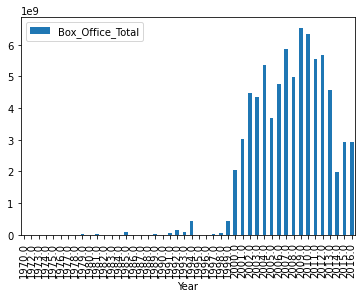

str

In [ ]:
#END